Performance testing for PCM regression analysis

In [1]:
import PcmPy as pcm
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from numpy import exp, sqrt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import time
from test_regression_performance import r2_score, method_compare, pcm_performance, likelihood_compare

## Comparision of different N-scaling for different likelihood functions: Normal ridge

In [9]:
T1 = pd.DataFrame()
Q = 20
comp  = np.zeros((Q,),dtype = int) # 20 regressors in 4 groups
theta = np.array([0.0,1.0]) # Theta's for simulation 
P = 30
# theta = np.array([-1.0,1.0])
# comp = np.zeros((Q,),dtype = int)
for N in [10,50,100,200,400,600,800,1000]:
    D = likelihood_compare(comp, theta, P = P, N = N, num_sim = 10,likefcn=['YYT_ZZT','YYT_ZTZ','YTY_ZZT','YTY_ZTZ'])
    D['N']=N
    D['P']=P
    D['Q']=Q
    T1 = T1.append(D, ignore_index=True)

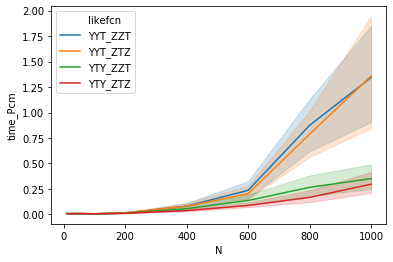

In [10]:
sb.lineplot(data=T1, x='N',y='time_Pcm',hue='likefcn')

## N-scaling for 4 components

In [2]:
TL = pd.DataFrame()
comp  = np.array([0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3]) # 20 regressors in 4 groups
Q = comp.shape[0]
theta = np.array([0.0,-2.0,-3.0,-1.0,1.0]) # Theta's for simulation 
P = 30
# theta = np.array([-1.0,1.0])
# comp = np.zeros((Q,),dtype = int)
for N in [10,50,100,200,400,600,800,1000]:
    D = likelihood_compare(comp, theta, P = P, N = N, num_sim = 10,likefcn=['YYT_ZZT','YYT_ZTZ','YTY_ZZT','YTY_ZTZ'])
    D['N']=N
    D['P']=P
    D['Q']=Q
    TL = TL.append(D, ignore_index=True)

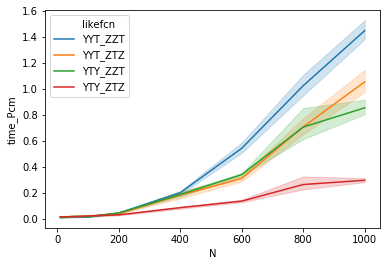

In [3]:
sb.lineplot(data=TL, x='N',y='time_Pcm',hue='likefcn')

## N-scaling for diffent Q-sizes and number of components
Not so clear cut here - For small Qp, it is very clear that there is for ZTZ - for larger Qp, it stops being totally obvious. 

In [19]:
T3 = pd.DataFrame()
N = 200
P = 1
for Qp in [1,2,5,10,50,100]:  
    for num_comp in [1,2, 4, 6]:
        Q = Qp * num_comp
        comp = np.kron(np.array(range(num_comp),dtype=int),np.ones((Qp,),dtype=int))
        theta = np.ones((num_comp+1,))*-2 # Theta's for simulation 
        theta[:-1]=0.0
        D = likelihood_compare(comp, theta, P = P, N = N, num_sim = 20,likefcn=['YTY_ZZT','YTY_ZTZ'])
        D['N']=N
        D['P']=P
        D['Qp']=Qp
        D['num_comp']=num_comp
        T3 = T3.append(D, ignore_index=True)

/Users/jdiedrichsen/Python/PcmPy/regression.py:278: RuntimeWarning: overflow encountered in exp
  G  = exp(model_params[comp])
/Users/jdiedrichsen/Python/PcmPy/regression.py:26: RuntimeWarning: invalid value encountered in matmul
  lam,_ = eigh(Zw.T @ Zw)
/Users/jdiedrichsen/Python/PcmPy/regression.py:297: RuntimeWarning: overflow encountered in exp
  iVdV.append(iVr @ Z[:,comp==i] @ Z[:,comp==i].T * exp(theta))
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1686: RuntimeWarning: invalid value encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
/Users/jdiedrichsen/Python/PcmPy/regression.py:313: RuntimeWarning: invalid value encountered in matmul
  dLdtheta[i] = -num_var / 2 * trace(iVdV[i]) + 0.5 * einsum('ij,ij->',Y.T @ iVdV[i], YiVr)
/Users/jdiedrichsen/Python/PcmPy/regression.py:343: RuntimeWarning: overflow encountered in exp
  G  = exp(model_params[comp])
/Users/jdiedrichsen/Python/PcmPy/regression.py

In [20]:
A= pd.pivot_table(T3[T3['likefcn']=='YTY_ZZT'], values='time_Pcm', index=['Qp'], columns=['num_comp'], aggfunc=np.mean)
B= pd.pivot_table(T3[T3['likefcn']=='YTY_ZTZ'], values='time_Pcm', index=['Qp'], columns=['num_comp'], aggfunc=np.mean)
(A-B)/A

num_comp,1,2,4,6
Qp,,,,
1,0.328953,0.292683,0.448408,0.552332
2,0.152005,0.272656,0.366187,0.439504
5,0.124564,0.183176,0.356472,0.401066
10,0.097391,0.199302,0.253905,0.304422
50,-0.015559,0.005586,-0.120208,0.089608
100,-0.095145,0.003697,-0.134189,0.007116


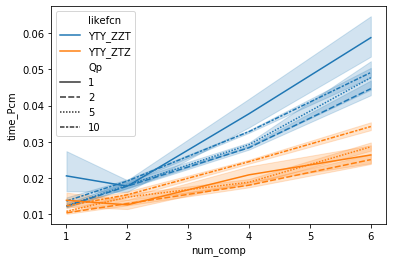

In [28]:
sb.lineplot(data=T3[T3.Qp<50], x='num_comp',y='time_Pcm',hue='likefcn',style='Qp')

In [25]:
T3

,theta0,theta1,R2_Pcm,time_Pcm,likefcn,iter,N,P,Qp,num_comp,theta2,theta3,theta4,theta5,theta6
0,1.287673,-2.166000,0.0,0.077345,YTY_ZZT,6.0,200,1,1,1,NaN,NaN,NaN,NaN,NaN
1,1.287673,-2.166000,0.0,0.017387,YTY_ZTZ,6.0,200,1,1,1,NaN,NaN,NaN,NaN,NaN
2,-0.549798,-2.051874,0.0,0.017651,YTY_ZZT,6.0,200,1,1,1,NaN,NaN,NaN,NaN,NaN
3,-0.549798,-2.051874,0.0,0.009567,YTY_ZTZ,6.0,200,1,1,1,NaN,NaN,NaN,NaN,NaN
4,-1.028683,-2.099718,0.0,0.023488,YTY_ZZT,6.0,200,1,1,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,-0.530749,0.123077,0.0,1.679800,YTY_ZTZ,18.0,200,1,100,6,0.020049,-1.811254,-0.438660,-0.410474,4.463915
956,-0.104062,-0.222226,0.0,0.671300,YTY_ZZT,7.0,200,1,100,6,0.081948,0.620153,-0.537268,0.204181,1.955036
957,-0.104062,-0.222226,0.0,0.700707,YTY_ZTZ,7.0,200,1,100,6,0.081948,0.620153,-0.537268,0.204181,1.955036
958,-0.746126,0.059067,0.0,1.367628,YTY_ZZT,8.0,200,1,100,6,0.350835,-0.464753,0.317105,-0.087977,-9.759279


## Compare likelihood functions for different shapes of Y
Likelihood functions can depend on quadratic form $Y^T A  Y$ or $Y Y^T A$. 
Depending of the shape on $Y$, one can be faster than the other 

In [24]:
TY = pd.DataFrame()
comp  = np.array([0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3]) # 20 regressors in 4 groups
Q = comp.shape[0]
theta = np.array([0.0,-2.0,-3.0,-1.0,1.0]) # Theta's for simulation 
for P in [1, 10, 50, 75, 100, 200, 300, 400]:
    for N in [100, 150, 200, 300, 400]:
        D = likelihood_compare(comp, theta, P = P, N = N, num_sim = 10,likefcn=['YYT_ZTZ','YTY_ZTZ'])
        D['N']=N
        D['P']=P
        D['Q']=Q
        TY = TY.append(D, ignore_index=True)

In [28]:
A= pd.pivot_table(TY[TY['likefcn']=='YYT_ZTZ'], values='time_Pcm', index=['N'], columns=['P'], aggfunc=np.mean)
B= pd.pivot_table(TY[TY['likefcn']=='YTY_ZTZ'], values='time_Pcm', index=['N'], columns=['P'], aggfunc=np.mean)
(A-B)/A

P,1,10,50,75,100,200,300,400
N,,,,,,,,
100,0.296094,0.100289,0.119375,-0.115890,-0.003672,-0.108128,-0.297512,-0.429419
150,0.212203,0.115395,0.104408,0.034576,-0.004188,-0.113122,-0.397517,-0.563095
200,0.271238,0.273344,0.158316,0.086384,0.047214,-0.123207,-0.459033,-0.684133
300,0.425004,0.365112,0.310691,0.266676,0.244091,-0.132749,-0.198665,-0.543281
400,0.336443,0.420191,0.326260,0.291252,0.298648,0.023656,-0.088887,-0.569343


From this it seems like that the Switch-point between the likelihood functions is aproximately at N > 1.5* P.

## Compare cross-validation vs. PCM for simple Ridge - influence of N 

In [8]:
TN = pd.DataFrame()
Q = 20
P = 1
theta = np.array([-1.0,1.0])
for N in [10,50,100,200,400,600,800,1000, 1500]: 
    comp = np.zeros((Q,),dtype = int)
    D = method_compare(comp, theta, P = P, N = N)
    D['N']=N
    D['P']=P
    D['Q']=Q
    TN = TN.append(D, ignore_index=True)

/Users/jdiedrichsen/Python/PcmPy/regression.py:27: RuntimeWarning: invalid value encountered in log
  ldet = sum(log(lam+1/iS)) - (N-sum(idx))*log(iS) # Shortcut to log-determinant


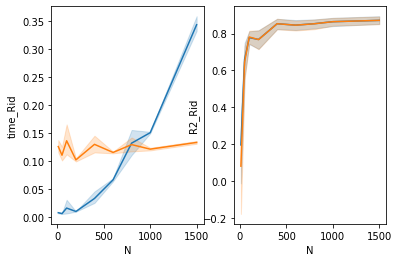

In [9]:
plt.subplot(1,2,1)
sb.lineplot(data = TN, x='N', y='time_Pcm')
sb.lineplot(data = TN, x='N', y='time_Rid')
plt.subplot(1,2,2)
sb.lineplot(data = TN, x='N', y='R2_Pcm')
sb.lineplot(data = TN, x='N', y='R2_Rid')

## Compare cross-validation vs. PCM for simple Ridge - influence of Q

In [4]:
TQ = pd.DataFrame()
theta = np.array([-1.0,1.0])
P=100
N=100
for Q in [1,5,10,50,100]: 
    comp = np.zeros((Q,),dtype = int)
    D = method_compare(comp, theta, P = P, N = N)
    D['N']=N
    D['P']=P
    D['Q']=Q
    TQ = TQ.append(D, ignore_index=True)

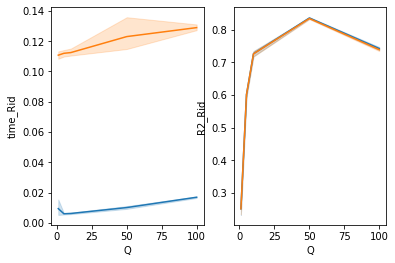

In [5]:
plt.subplot(1,2,1)
sb.lineplot(data = TQ, x='Q', y='time_Pcm')
sb.lineplot(data = TQ, x='Q', y='time_Rid')
plt.subplot(1,2,2)
sb.lineplot(data = TQ, x='Q', y='R2_Pcm')
sb.lineplot(data = TQ, x='Q', y='R2_Rid')

## Compare cross-validation vs. PCM for simple Ridge - influence of P

In [6]:
TP = pd.DataFrame()
theta = np.array([-1.0,1.0])
Q = 20
N = 100
for P in [1,10,100,500,1000,1500,2000]: 
    comp = np.zeros((Q,),dtype = int)
    D = method_compare(comp, theta, P = P, N = N)
    D['N']=N
    D['P']=P
    D['Q']=Q
    TP = TP.append(D, ignore_index=True)

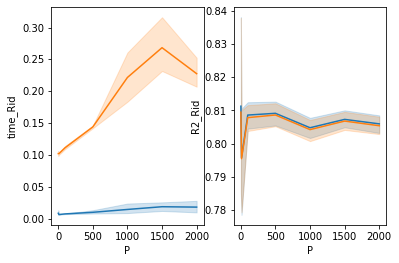

In [7]:
plt.subplot(1,2,1)
sb.lineplot(data = TP, x='P', y='time_Pcm')
sb.lineplot(data = TP, x='P', y='time_Rid')
plt.subplot(1,2,2)
sb.lineplot(data = TP, x='P', y='R2_Pcm')
sb.lineplot(data = TP, x='P', y='R2_Rid')